<a href="https://colab.research.google.com/github/gowthamana2024/FOML-exp-9/blob/main/FOML_EXP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silhouette Score: 0.28


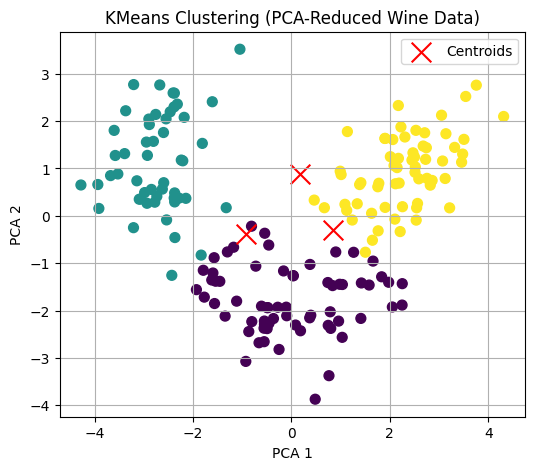

In [2]:
#gowthaman A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load and standardize data
wine = load_wine()
X = wine.data
y = wine.target  # For comparison only

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Silhouette Score
print(f"Silhouette Score: {silhouette_score(X_scaled, y_kmeans):.2f}")

# Plot Clusters
plt.figure(figsize=(6, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='red', marker='x', s=200, label='Centroids')
plt.title("KMeans Clustering (PCA-Reduced Wine Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()


KNN Accuracy: 0.9629629629629629

Confusion Matrix:
 [[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        19
     class_1       1.00      0.90      0.95        21
     class_2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



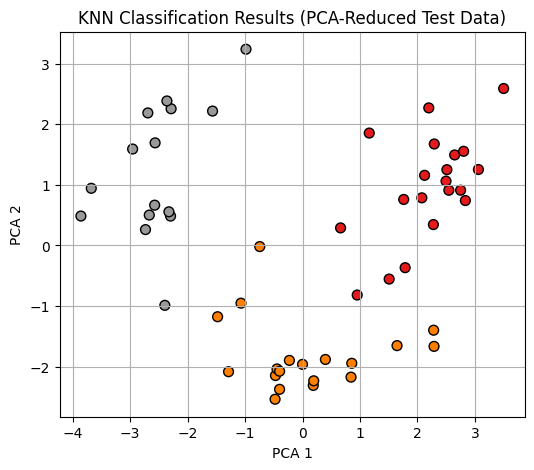

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=wine.target_names))

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

# Visualize decision boundary in PCA space
plt.figure(figsize=(6, 5))
plt.scatter(X_pca_test[:, 0], X_pca_test[:, 1], c=y_pred, cmap='Set1', s=50, edgecolor='k')
plt.title("KNN Classification Results (PCA-Reduced Test Data)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()
